![image.png](plots/one_class_svm.png)
___


Decimos que un punto es un outlier si tiene un valor anómalo comparado con el resto de puntos del conjunto de datos. Un problema típico en estadística es el de buscar estos outliers para estudiarlos más a fondo o eliminarlos del conjunto de datos. Las SVM también pueden ayudarnos en este trabajo, en concreto, las conocidas como __One class SVM__.

Estas SVM se llaman One class porque se entrenan en conjnutos de datos en los que solo tenemos una clase: los datos que no son outliers. La SVM aprenderá cómo se distribuyen estos datos y construirá un hiperplano en el que todos los puntos normales estén en el mismo lado. De esta forma, los puntos extraños (los outliers) estarán en el otro lado del hiperplano.

Veamos un ejemplo:

En las libretas anteriores hemos visto cómo trabajar con las SVM en problemas de clasificación, en los que la variable respuesta es categórica. Pero también es posible usarlas en problemas de regresión. En este tipo de problemas, en lugar de buscar un hiperplano separador de margen máximo (objetivo de la clasificación) lo que buscamos es __un hiperplano tal que los margenes contengan al mayor número posible de puntos__. Aún así, la idea detrás de las SVM en regresión sigue siendo la misma: aprovechar el __kernel trick__ para "proyectar" el conjunto de datos a un espacio de dimensión más alta donde tengan un comportamiento lineal. 

Veamos un ejemplo con un conjunto de datos sintético con dos variables, una predictora y una respuesta con una relación no lineal:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import OneClassSVM

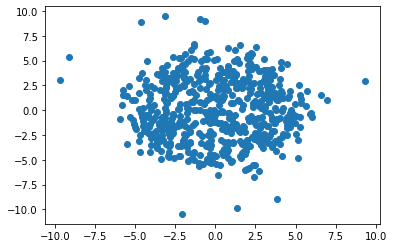

In [2]:
data = pd.read_csv('data/data_outlier.csv')

plt.scatter(data['V1'], data['V2'])

Podemos ver que la mayoría de puntos están concentrados en el centro, pero unos pocos están más alejados. Esos puntos son outliers, comparados con el resto del conjunto. Intentemos detectarlos usando una One Class SVM. En primer lugar, estandarizamos el conjunto de datos.

In [3]:
data = (data - data.mean()) / data.std()

Ahora entrenemos una One Class SVM y obtengamos las predicciones asociadas al conjunto de datos. Hay un cambio importante en los parámetros de las One Class SVM en comparación con las SVM de clasificación y de regresión, y es el uso del parámetro `nu` $\nu$. Este parámetro:

* Establece una cota superior de la fracción de puntos que creemos que son outliers, 
* Establece una cota inferior al número de puntos usados como vectores soporte.

Es por esto que suele darse al parámetro `nu` el valor del porcentaje aproximado de outliers que creemos que hay.

In [4]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.015)

final_prediction = svm.fit_predict(data)

Recuperamos dos funciones definidas al inicio del curso, que nos permitirán representar gráficamente la frontera de decisión:

In [5]:
def scatter_plot_svm(X, y):
    """
    X: matriz de dimensiones [n_obs, 2]
    y: vector binario con valores 0 o 1
    Representación del scatterplot de las variables de X en base a las categorías de y
    """
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")    # Pintar con triangulos verdes los puntos de la categoría 1
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bs")    # Pintar con cuadrados azules los puntos de la categoría 0
    plt.grid(True, which='both')  

def plot_predictions(svm_clf, axes):
    """
    svm_clf: Pipeline con una SVM final
    axes: ejes en los que representar el hiperplano
    Función que representa gráficamente el hiperplano separador generado por la svm
    """
    x0s = np.linspace(axes[0], axes[1], 100)                      # Generamos puntos en eje horizontal
    x1s = np.linspace(axes[2], axes[3], 100)                      # Generamos puntos en eje vertical
    x0, x1 = np.meshgrid(x0s, x1s)                                # Hacemos mallado de puntos
    X = np.c_[x0.ravel(), x1.ravel()]                             # Matriz que contiene 2 columnas, con cada par de valores 
    y_pred = svm_clf.predict(X).reshape(x0.shape)                 # Predicciones de la svm
    y_decision = svm_clf.decision_function(X).reshape(x0.shape)   # Valor de la función de decisión
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)      # Añadimos contorno en base a las predicciones
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)  # Añadimos lineas de nivel en base al valor de la función de decisión (hiperplano)
    svs = svm_clf.support_vectors_                                    # Vectores soporte
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')# Pintar area alrededor de vectores soporte

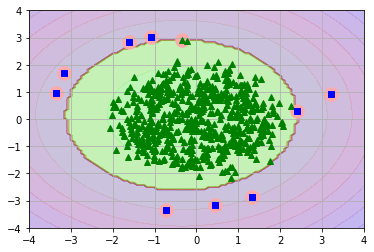

In [6]:
plot_predictions(svm, axes=[-4, 4, -4, 4])
scatter_plot_svm(data.values, final_prediction)

![image.png](plots/svm_regresion.png)
___

In [7]:
from sklearn.svm import SVR

In [8]:
x = np.arange(-6.0, 6.0, 0.1)

y = 1*(x**3) + 2*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)

ydata = y + y_noise

x = x.reshape((-1,1))

In [9]:
def custom_scatter(x,y):
    plt.figure(figsize=(8,6))
    plt.plot(x, ydata,  'bo')
    plt.ylabel('Variable dependiente')
    plt.xlabel('Variable independiente')

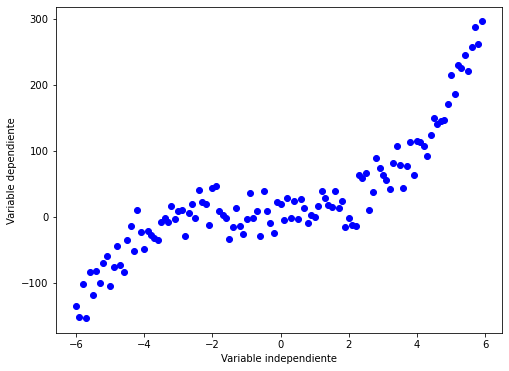

In [10]:
custom_scatter(x,ydata)

Veamos cómo entrenar una SVM con un kernel lineal en primer lugar.

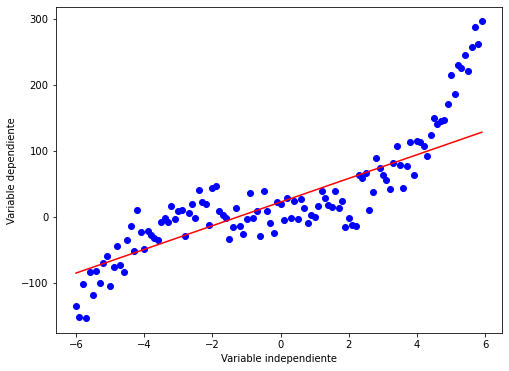

In [11]:
svr_lineal = SVR(kernel='linear')
svr_lineal.fit(x, ydata)
final_prediction = svr_lineal.predict(x)

custom_scatter(x,ydata)
plt.plot(x, final_prediction, color='red')

Podemos ver que nuestra predicción (en rojo) no se aproxima nada bien al comportamiento no lineal de este conjunto de datos.

### <font color='D12828'> Ejercicio: </font>
* Prueba a entrenar una SVR con kernel polinómico.

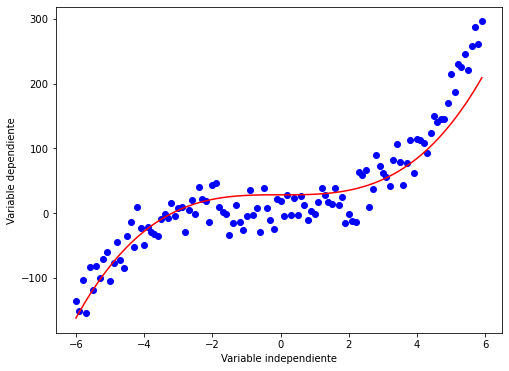

In [12]:
# Ejercicio

svr_poly = SVR(kernel='poly')
svr_poly.fit(x, ydata)
final_prediction = svr_poly.predict(x)

custom_scatter(x, ydata)
plt.plot(x, final_prediction, color='red')

# Final
___
Con esto termina nuestra introducción a las máquinas de vector soporte. ¡Espero que hayais disfrutado del curso!

![image.png](plots/fin_svm_2.png)